<a href="https://colab.research.google.com/github/g-harsha01/CreditCard_Detection/blob/main/CreditCardDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

##Introduction

### **Credit card purchases done in Europe in September 2013 are included in this dataset. There were 492 fraudulent transactions out of a total of 284,807 in this dataset, which covered a time period of two days. Only 0.172% of all transactions are in the positive class (frauds), indicating a severe imbalance in the dataset.**


*   Principal components analysis (PCA) yields features V1, V2,..., V28
*   Time and Quantity are the only features that PCA has not been applied to. Feature Time includes the number of seconds that have passed since the initial transaction in the dataset. The feature Amount is the amount of the transaction, which can be utilised for cost-sensitive learning based on examples.
*   When fraud is present, the response variable, Feature Class, has a value of 1, and when it is not, it has a value of 0.





## Loading Packages

In [ ]:
# Imported Libraries

import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.patches as mpatches
import plotly.figure_factory as ff
import time

In [ ]:
# Classifier Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import collections

In [ ]:
# Other Libraries

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

## Importing the data

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'cherukuriashish'
os.environ['KAGGLE_KEY'] = '8ef2e816c6fb300ce0e1c81a40c07341'

In [ ]:
!pip install kaggle

!kaggle datasets download -d mlg-ulb/creditcardfraud

!unzip creditcardfraud.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
 86% 57.0M/66.0M [00:00<00:00, 148MB/s]
100% 66.0M/66.0M [00:00<00:00, 144MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Gathering Sense of our data

>Check for **NULL** values


In [ ]:
df.isnull().sum().max()
#There is no missing data in the entire dataset.

0

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
l=len(df)
nf=df['Class'].value_counts()[0]/l * 100
f=df['Class'].value_counts()[1]/l * 100
print('No Frauds', round(nf,2), '% of the dataset')
print('Frauds', round(f,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


---

>Data Unbalance

In [ ]:
# Get value counts of the "Class" column in the dataframe
temp = df["Class"].value_counts()

# Create a new dataframe to store the value counts
class_counts_df = pd.DataFrame({'Class': temp.index, 'values': temp.values})

# Define the plot title and trace name
plot_title = "Class Distribution for Credit Card Transactions (Non-fraudulent = 0, Fraudulent = 1)"
trace_name = "Transaction Count"

# Define the trace for the bar plot
trace = go.Bar(
    x=class_counts_df['Class'],
    y=class_counts_df['values'],
    name=trace_name,
    marker=dict(color="Red"),
    text=class_counts_df['values']
)

# Define the layout of the plot
layout = dict(
    title=plot_title,
    xaxis=dict(title='Class', showticklabels=True),
    yaxis=dict(title='Number of Transactions'),
    hovermode='closest',
    width=600
)

# Create the figure and display the plot
fig = go.Figure(data=[trace], layout=layout)
fig.show()


**Distributions**: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features.
Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class.



---

>Data Exploration

In [ ]:
# Get the Time column data for non-fraudulent and fraudulent transactions
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

# Define the histogram data and group labels
hist_data = [class_0, class_1]
group_labels = ['Non-fraudulent', 'Fraudulent']

# Create the density plot using the histogram data and group labels
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)

# Update the plot layout to include a title and x-axis label
fig['layout'].update(title='Density Plot of Credit Card Transaction Time vs Amount', xaxis=dict(title='Time [s]'))

# Display the plot
iplot(fig, filename='dist_only')


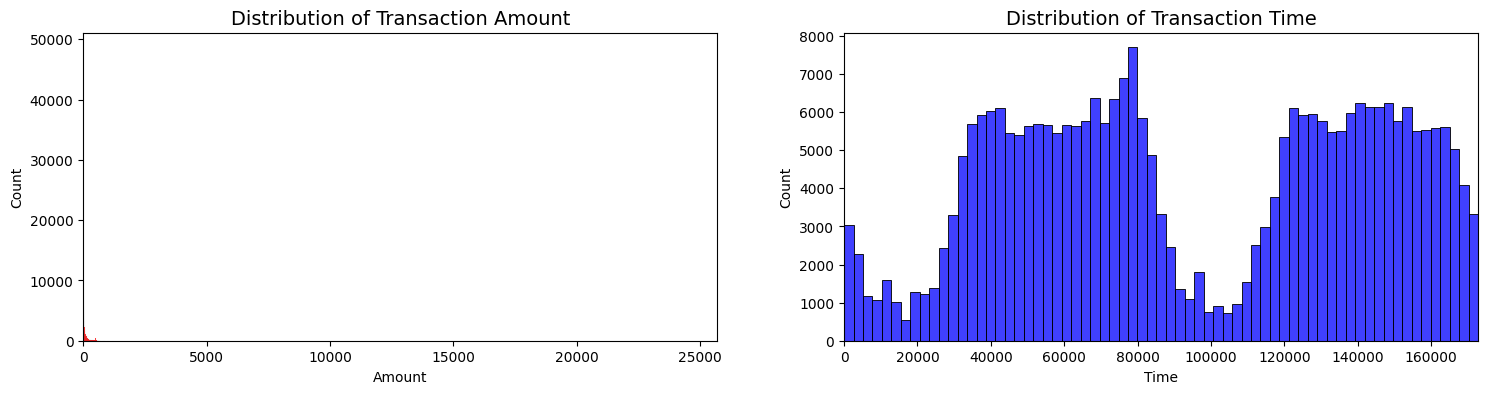

In [ ]:
# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(ncols=2, figsize=(18, 4))

# Plot the distribution of transaction amount in the first subplot
sns.histplot(df['Amount'], ax=axes[0], color='r')
axes[0].set_title('Distribution of Transaction Amount', fontsize=14)

# Plot the distribution of transaction time in the second subplot
sns.histplot(df['Time'], ax=axes[1], color='b')
axes[1].set_title('Distribution of Transaction Time', fontsize=14)

# Set the x-axis limits for each subplot based on the minimum and maximum values of the data
x0, x1 = df['Amount'].min(), df['Amount'].max()
x2, x3 = df['Time'].min(), df['Time'].max()
axes[0].set_xlim(x0, x1)
axes[1].set_xlim(x2, x3)

# Display the plot
plt.show()


When compared to legitimate transactions, fraudulent ones are more uniformly spread out in time. This holds true even for the low genuine transaction times that occur at night in the Europe timezone.

---

>Transactions Amount

In [ ]:
# Import the necessary libraries
import plotly.express as px

# Select only fraudulent transactions from the dataset
fraud = df.loc[df['Class'] == 1]

# Create a scatter plot with the time and amount of each fraudulent transaction
fig = px.scatter(fraud, x='Time', y='Amount', color='Amount', size='Amount', 
                 title='Amount of Fraudulent Transactions', hover_data=['Amount'])

# Update the transparency and line width of the markers to improve visibility
fig.update_traces(marker=dict(opacity=0.5, line=dict(width=0.5, color='red')))

# Update the layout of the plot to include axis labels and hover mode
fig.update_layout(xaxis_title='Time [s]', yaxis_title='Amount', hovermode='closest')

# Display the plot
fig.show()


---

>Features Correlation

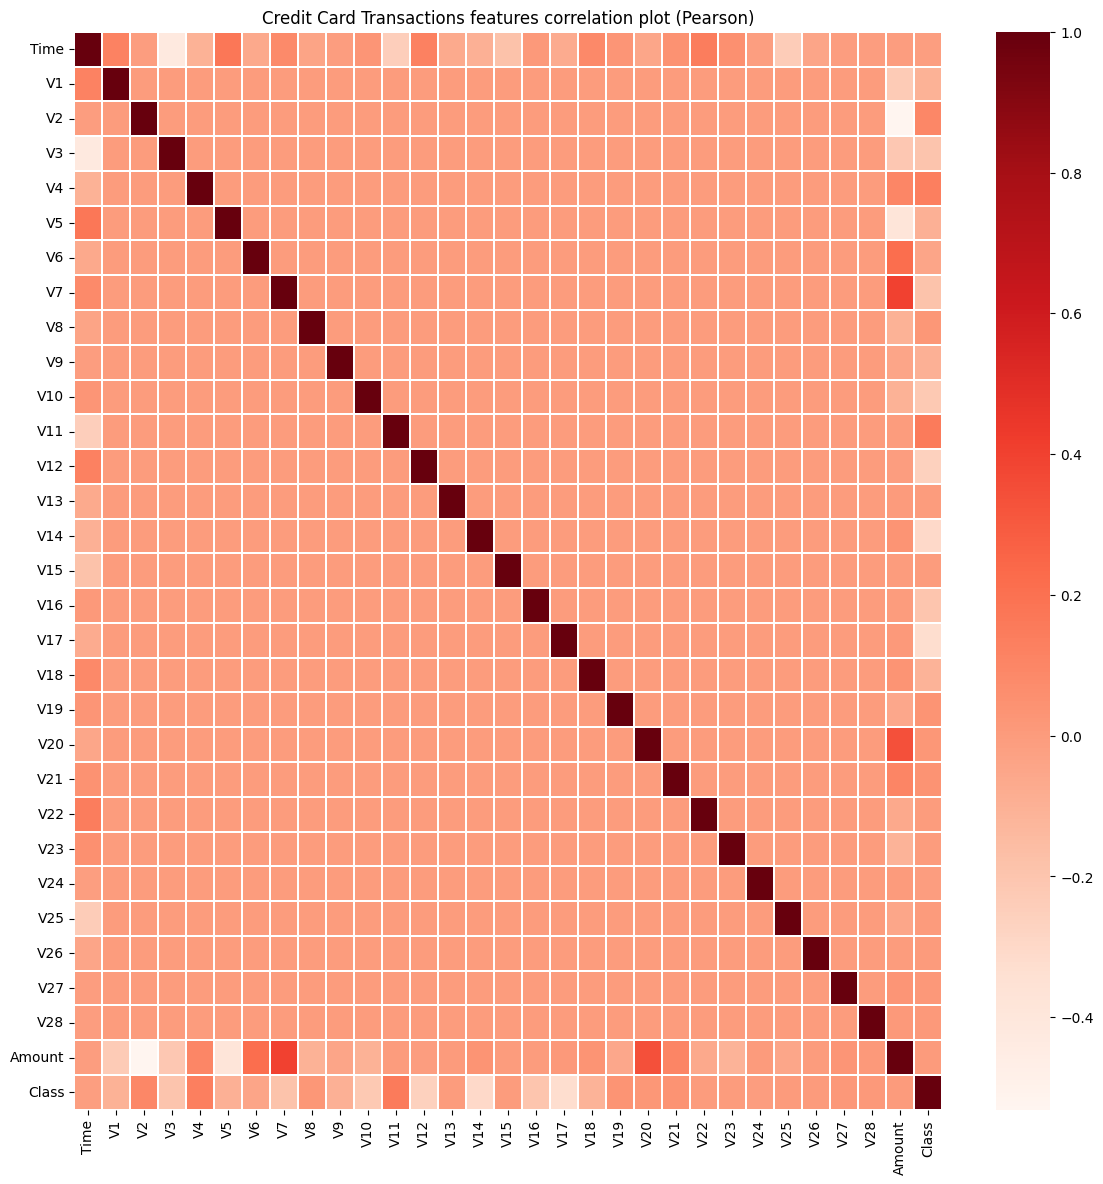

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

---

## Scaling and Distributing

The Time and Amount columns will be the first to be transformed. The columns for time and money should have the same scale as the others. But, we must also build a sub sample of the dataframe to ensure that there is a balanced number of Fraud and Non-Fraud cases, which will aid our algorithms in better understanding the patterns that define if a transaction is fraudulent.

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Create instances of StandardScaler and RobustScaler
# RobustScaler is less sensitive to outliers than StandardScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

d1=df['Amount'].values.reshape(-1,1)
d2=df['Time'].values.reshape(-1,1)
df['scaled_amount'] = rob_scaler.fit_transform(d1)
df['scaled_time'] = rob_scaler.fit_transform(d2)

# Remove the original 'Time' and 'Amount' columns from the DataFrame 'df'
#df.drop(['Time','Amount'], axis=1, inplace=True)

---

A major imbalance in the original dataframe was discovered at the beginning of this notebook. Here are some problems that will arise if we stick with the original dataframe:


1.   **Overfitting:** Our prediction algorithms will work under the assumption that fraud is extremely rare. Our goal with this approach is to be confident that we can pinpoint the occurrence of fraud.
2.   **Wrong Correlations:** Although we do not know what the "V" characteristics represent, it would be good to understand how each of these features affects the outcome (Fraud or No Fraud). Due to an imbalanced dataframe, we cannot detect the true correlations between the class and features.



In [ ]:
# Store the scaled amount and scaled time columns in variables
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

# Remove the scaled amount and scaled time columns from the DataFrame
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

# Insert the scaled amount and scaled time columns back into the DataFrame at the beginning
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.783274,-0.994983,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,-0.269825,-0.994983,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,4.983721,-0.994972,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.418291,-0.994972,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.670579,-0.994960,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Summary:**
* Scaled amount and scaled time are the columns with scaled values.
* There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
* We concat the 492 cases of fraud and non fraud, creating a new sub-sample.


---



## Train - Test - Validation split

>Define Predictors and target values

In [ ]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

---

>Train - Validation - Test Split

In [ ]:
#TRAIN/VALIDATION/TEST SPLIT
VALID_SIZE = 0.20 
TEST_SIZE = 0.20
RANDOM_STATE = 2023

train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Random Undersampling

In [ ]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279952,2.068050,0.992857,169203.0,1.623617,-0.621390,-0.990044,1.279020,-0.128871,0.064956,-0.051744,...,0.137474,0.089493,0.083378,0.658526,-0.128207,-0.763712,-0.010108,-0.015138,170.00,0
233258,13.613778,0.737896,147501.0,-1.611877,-0.408410,-3.829762,6.249462,-3.360922,1.147964,1.858425,...,1.245582,0.616383,2.251439,-0.066096,0.538710,0.541325,-0.136243,-0.009852,996.27,1
277107,0.670579,0.972439,167465.0,-2.258468,1.276257,0.156118,-0.525626,-1.183558,-0.495575,-0.344647,...,0.261567,0.981053,-0.300548,0.080271,-0.205801,0.569035,0.003444,-0.148014,69.99,0
8296,-0.293440,-0.864813,11080.0,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,...,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1.00,1
281674,0.286872,1.006309,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

---

## Logistic Regression

In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
}

In [ ]:
from sklearn.model_selection import KFold

num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for clf_name, clf in classifiers.items():
    
    clf.fit(X_train, y_train)
    
    # Evaluate the classifier using cross-validation
    scores = []
    for train_index, val_index in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
        clf.fit(X_train_fold, y_train_fold)
        fold_score = clf.score(X_val_fold, y_val_fold)
        scores.append(fold_score)
    
    ms=np.mean(scores)
    sds=np.std(scores)
    mean_score = round(ms, 2) * 100
    std_score = round(sds, 2) * 100
    
    # Print the results
    print(f"{clf_name} has a training score of {mean_score}% +/- {std_score}%")

LogisiticRegression has a training score of 95.0% +/- 1.0%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    #'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Initialize the logistic regression model
log_reg = LogisticRegression()

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding logistic regression model
bp=grid_search.best_params_
be=grid_search.best_estimator_
print("Best hyperparameters: ", bp)
print("Best logistic regression model: ", be)

Best hyperparameters:  {'C': 0.1}
Best logistic regression model:  LogisticRegression(C=0.1)


In [ ]:
# Overfitting Case
from sklearn.model_selection import cross_val_score
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
lr0=log_reg_score.mean()
lr1=lr0 * 100
print('Logistic Regression Cross Validation Score: ', round(lr1, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.27%


In [ ]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1) = plt.subplots(1,1, figsize=(6,4), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    t1=train_scores_mean - train_scores_std
    t2=train_scores_mean + train_scores_std
    ax1.fill_between(train_sizes, t1,t2, alpha=0.1,color="#ff9124")
    t3= test_scores_mean - test_scores_std
    t4= test_scores_mean + test_scores_std           
    ax1.fill_between(train_sizes, t3,t4, alpha=0.1, color="#2492ff")
                     
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

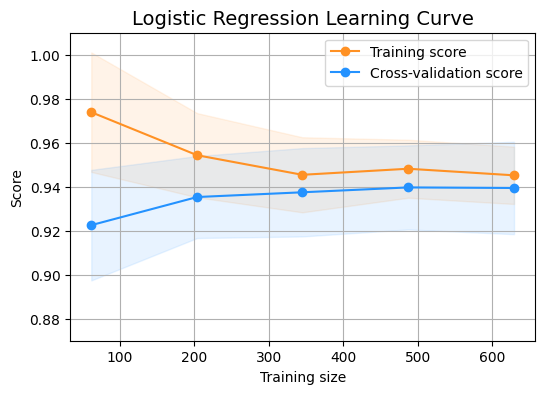

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

In [ ]:
from sklearn.metrics import roc_auc_score
ra1=roc_auc_score(y_train, log_reg_pred)
print('ROC AUC score for Logistic Regression: ', ra1)

ROC AUC score for Logistic Regression:  0.9709779587615539


In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)

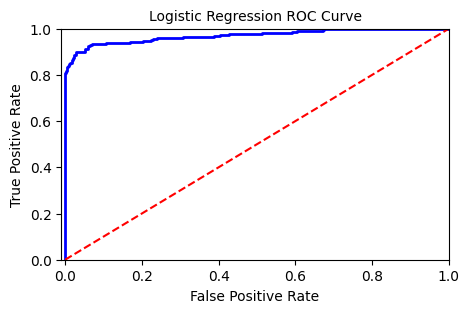

In [ ]:
import matplotlib.pyplot as plt

def logistic_roc_curve(log_fpr, log_tpr):
    fig, ax = plt.subplots(figsize=(5,3))
    ax.set_title('Logistic Regression ROC Curve', fontsize=10)
    ax.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    ax.plot([0, 1], [0, 1], 'r--')
    ax.set_xlabel('False Positive Rate', fontsize=10)
    ax.set_ylabel('True Positive Rate', fontsize=10)
    ax.set_xlim([-0.01, 1])
    ax.set_ylim([0, 1])
    plt.show()

logistic_roc_curve(log_fpr, log_tpr)

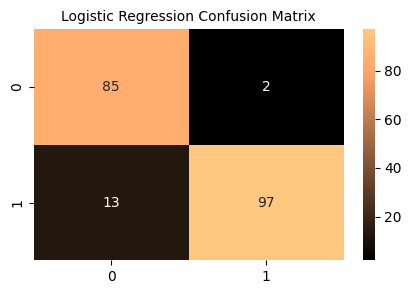

In [ ]:
from sklearn.metrics import confusion_matrix

log_reg = grid_search.best_estimator_
log_reg.fit(X_train, y_train)
y_pred_log_reg1 = log_reg.predict(X_test)
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg1)

plt.figure(figsize=(5,3))
sns.heatmap(log_reg_cf,  annot=True, cmap=plt.cm.copper)
plt.title("Logistic Regression Confusion Matrix", fontsize=10)
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)
rl=recall_score(y_train, y_pred)
ps=precision_score(y_train, y_pred)
f1s=f1_score(y_train, y_pred)
acs=accuracy_score(y_train, y_pred)
# Overfitting Case
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(rl))
print('Precision Score: {:.2f}'.format(ps))
print('F1 Score: {:.2f}'.format(f1s))
print('Accuracy Score: {:.2f}'.format(acs))

Overfitting: 

Recall Score: 0.93
Precision Score: 0.98
F1 Score: 0.95
Accuracy Score: 0.95


SMOTE Technique (Over-Sampling):

SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

lxt1=len(original_Xtrain)
lyt1=len(original_ytrain)
lxt2=len(original_Xtest)
lyt2=len(original_ytest)
print('Length of X (train): {} | Length of y (train): {}'.format(lxt1, lyt1))
print('Length of X (test): {} | Length of y (test): {}'.format(lxt2, lyt2))

# Define lists to store evaluation metrics
metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'auc': []
}

# Define the classifier and hyperparameter search space
log_reg_sm = LogisticRegression()
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(log_reg_sm, param_grid, n_iter=4)

# Implement SMOTE during cross-validation
for train_idx, test_idx in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    pipeline.fit(original_Xtrain[train_idx], original_ytrain[train_idx])
    y_pred = pipeline.predict(original_Xtrain[test_idx])

    pso=precision_score(original_ytrain[test_idx], y_pred)
    rso=recall_score(original_ytrain[test_idx], y_pred)
    f1so=f1_score(original_ytrain[test_idx], y_pred)
    raso=roc_auc_score(original_ytrain[test_idx], y_pred)
    # Compute evaluation metrics 
    metrics['accuracy'].append(pipeline.score(original_Xtrain[test_idx], original_ytrain[test_idx]))
    metrics['precision'].append(pso)
    metrics['recall'].append(rso)
    metrics['f1'].append(f1so)
    metrics['auc'].append(raso)

# Print the average evaluation metrics
for metric, values in metrics.items():
    print(f"{metric}: {np.mean(values)}")

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
accuracy: 0.9700985501960091
precision: 0.11901022886301671
recall: 0.9011359948068808
f1: 0.1989727202651092
auc: 0.9356770750693384


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

lxt1=len(original_Xtrain)
lyt1=len(original_ytrain)
lxt2=len(original_Xtest)
lyt2=len(original_ytest)
print('Length of X (train): {} | Length of y (train): {}'.format(lxt1, lyt1))
print('Length of X (test): {} | Length of y (test): {}'.format(lxt2, lyt2))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), param_grid, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961

accuracy: 0.9625672227027321
precision: 0.15380303505078194
recall: 0.8910094125283999
f1: 0.22269442635750764


In [ ]:
"""labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))"""

"labels = ['No Fraud', 'Fraud']\nsmote_prediction = best_est.predict(original_Xtest)\nprint(classification_report(original_ytest, smote_prediction, target_names=labels))"

In [ ]:
y_score = best_est.decision_function(original_Xtest)

In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)

Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [ ]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

log_reg_sm = grid_search.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)

LogisticRegression(C=0.1)

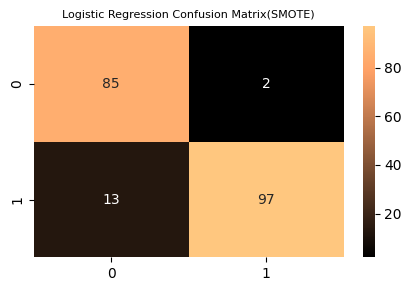

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)
log_reg_cf1 = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(5,3))


sns.heatmap(log_reg_cf1, annot=True, cmap=plt.cm.copper)
plt.title("Logistic Regression Confusion Matrix(SMOTE)", fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        87
           1       0.98      0.88      0.93       110

    accuracy                           0.92       197
   macro avg       0.92      0.93      0.92       197
weighted avg       0.93      0.92      0.92       197



In [ ]:
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)
print("Score for Logistic Regression with Under-Sampling")
print(undersample_score)
print("Score for Logistic Regression with SMOTE Technique")
print(oversample_score)

Score for Logistic Regression with Under-Sampling
0.9238578680203046
Score for Logistic Regression with SMOTE Technique
0.998700865504468


## Decision Tree

In [ ]:
classifiers = {
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid=tree_params, cv=5)
grid_tree.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding logistic regression model
bp1=grid_tree.best_params_
tree_clf=grid_tree.best_estimator_
print("Best hyperparameters: ", bp1)
print("Best Decision tree model: ", tree_clf)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
Best Decision tree model:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)


In [ ]:
# Overfitting Case

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
ts0=tree_score.mean()
ts1=ts0 * 100
print('DecisionTree Classifier Cross Validation Score', round(ts1, 2).astype(str) + '%')

DecisionTree Classifier Cross Validation Score 92.63%


In [ ]:
# Let's Plot Decisiontree Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve( estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax4) = plt.subplots(1,1, figsize=(6,4), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    t1=train_scores_mean - train_scores_std
    t2=train_scores_mean + train_scores_std
    ax4.fill_between(train_sizes, t1, t2, alpha=0.1,color="#ff9124")
              
    t3= test_scores_mean - test_scores_std
    t4= test_scores_mean + test_scores_std                
    ax4.fill_between(train_sizes, t3,t4, alpha=0.1, color="#2492ff")
                     
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier Learning Curve", fontsize=10)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

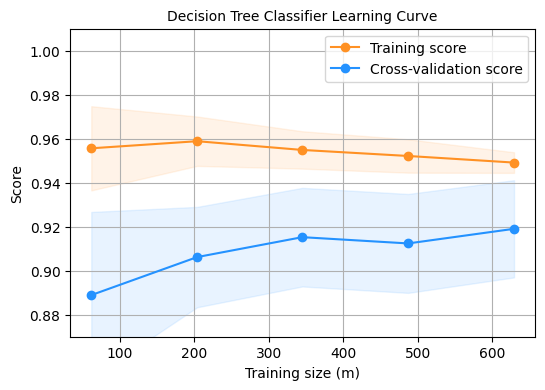

In [ ]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_dt=roc_auc_score(y_train, tree_pred)
print('ROC AUC Score for Decision Tree Classifier: ', roc_auc_dt)

ROC AUC Score for Decision Tree Classifier:  0.925496089457695


In [ ]:
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

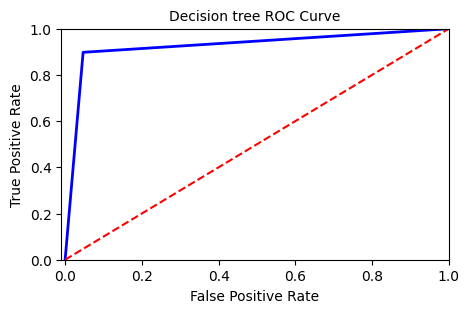

In [ ]:
def dt_roc_curve(log_fpr, log_tpr):
    fig, ax = plt.subplots(figsize=(5,3))
    ax.set_title('Decision tree ROC Curve', fontsize=10)
    ax.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    ax.plot([0, 1], [0, 1], 'r--')
    ax.set_xlabel('False Positive Rate', fontsize=10)
    ax.set_ylabel('True Positive Rate', fontsize=10)
    ax.set_xlim([-0.01, 1])
    ax.set_ylim([0, 1])
    plt.show()

dt_roc_curve(tree_fpr, tree_tpr)

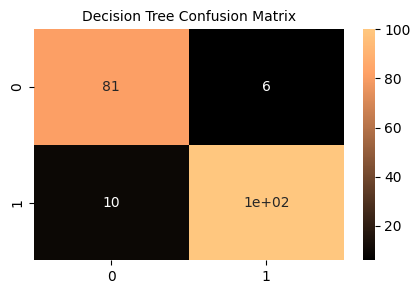

In [ ]:
from sklearn.metrics import confusion_matrix


tree_clf = grid_tree.best_estimator_
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
tree_cf = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(5,3))
sns.heatmap(tree_cf, annot=True, cmap=plt.cm.copper)
plt.title("Decision Tree Confusion Matrix", fontsize=10)
plt.show()

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred_dt = tree_clf.predict(X_train)

rl=recall_score(y_train, y_pred_dt)
f1s=f1_score(y_train, y_pred_dt)
acs=accuracy_score(y_train, y_pred_dt)

print('Recall Score: {:.2f}'.format(rl))
print('F1 Score for Decision tree: {:.2f}'.format(f1s))
print('Accuracy Score: {:.2f}'.format(acs))

Recall Score: 0.93
F1 Score for Decision tree: 0.95
Accuracy Score: 0.95


## Random Forest Classifier

In [ ]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [ ]:
# Train the RandonForestClassifier using the train_df data and fit function.

clf.fit(train_df[predictors], train_df[target].values)


RandomForestClassifier(n_jobs=4, random_state=2023, verbose=False)

In [ ]:
#predict the target values for the valid_df data, using predict function.

preds = clf.predict(valid_df[predictors])

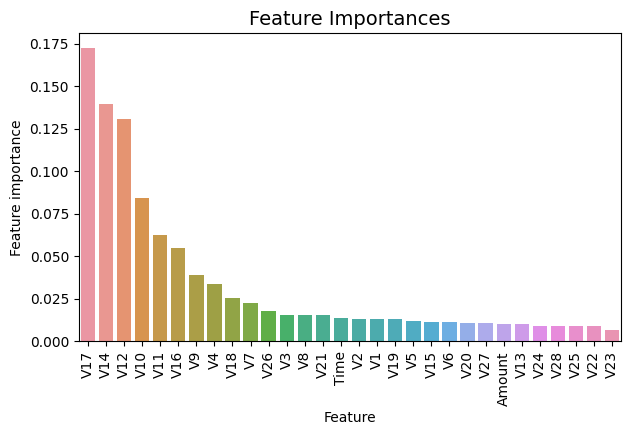

In [ ]:
# Create a DataFrame with the feature importances of a classifier
feature_importances = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})

# Sort the features by their importance in descending order
feature_importances = feature_importances.sort_values(by='Feature importance', ascending=False)

# Create a bar plot to visualize the feature importances
plt.figure(figsize=(7, 4))
plt.title('Feature Importances', fontsize=14)
sns.barplot(x='Feature', y='Feature importance', data=feature_importances)
plt.xticks(rotation=90)
plt.show()


The most important features are **V17, V16, V14, V12, V11, V10.**

---

>Confusion Matrix

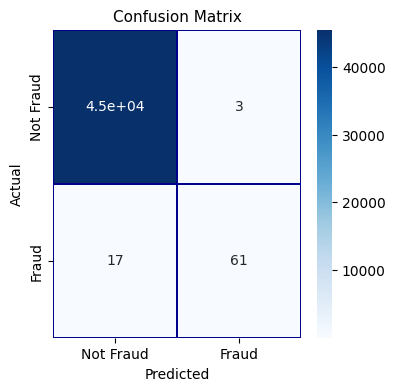

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(4,4))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=11)
plt.show()

---

>F1 Score

In [ ]:
f1_score(valid_df[target].values, preds)

0.8591549295774649

The f1_score obtained with RandomForrestClassifier is "0.859".

>Area Under Curve

In [ ]:
#Let's calculate the ROC-AUC score

roc_auc_score(valid_df[target].values, preds)

0.8909926674704323

The **ROC-AUC** score obtained with **RandomForrestClassifier** is "**0.89**".

---

## AdaBoost Classifier

In [ ]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)

In [ ]:
# Train the AdaBoost Classifier using the train_df data and fit function.

clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=2023)

In [ ]:
#predict the target values for the valid_df data, using predict function.

preds = clf.predict(valid_df[predictors])

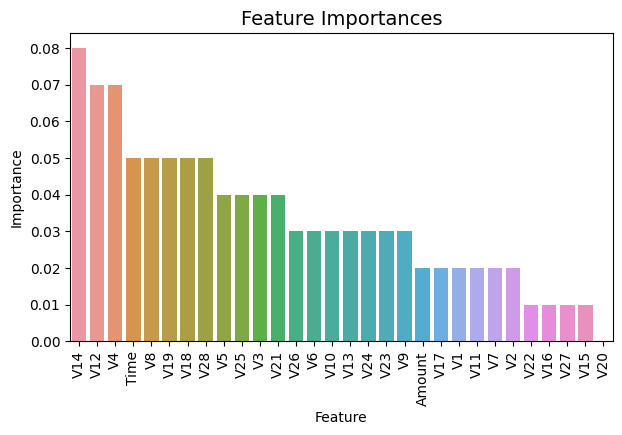

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# create a DataFrame to store the feature importances
df = pd.DataFrame({'Feature': predictors, 'Importance': clf.feature_importances_})

# sort the DataFrame by feature importance in descending order
df = df.sort_values(by='Importance', ascending=False)

# create a bar plot of the feature importances
plt.figure(figsize=(7, 4))
plt.title('Feature Importances', fontsize=14)
sns.barplot(x='Feature', y='Importance', data=df)
plt.xticks(rotation=90)
plt.show()


>Confusion Matrix

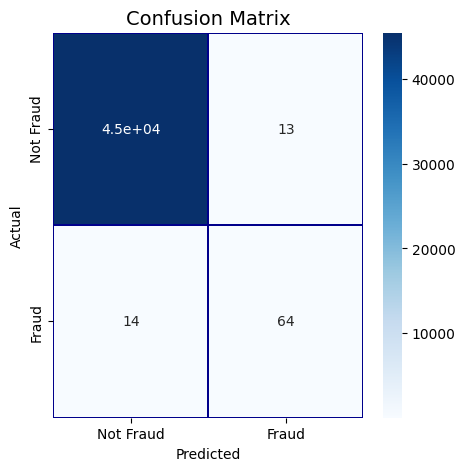

In [ ]:
# Generate a confusion matrix to evaluate the performance of a model
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation table of the actual target values and the predicted values
confusion_matrix = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])

# Plot the confusion matrix as a heatmap
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(confusion_matrix, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True, ax=ax1,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()


---

>F1 Score

In [ ]:
f1_score(valid_df[target].values, preds)

0.8258064516129032

The f1_score obtained with AdaBoostClassifier is "0.825".

>Area Under Curve

In [ ]:
roc_auc_score(valid_df[target].values, preds)

0.9101135248505058

The **ROC-AUC** score obtained with **AdaBoostClassifier** is "**0.91**".

---

## XGBoost

In [ ]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [ ]:
#Train the model
MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 500  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[15:18:51] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.86720	valid-auc:0.87807
[50]	train-auc:0.92562	valid-auc:0.94198
[100]	train-auc:0.95401	valid-auc:0.96502
[150]	train-auc:0.97254	valid-auc:0.97411
[200]	train-auc:0.98857	valid-auc:0.98540
[250]	train-auc:0.99262	valid-auc:0.98758
[300]	train-auc:0.99454	valid-auc:0.99038
[350]	train-auc:0.99603	valid-auc:0.99131
[400]	train-auc:0.99698	valid-auc:0.99249
[450]	train-auc:0.99786	valid-auc:0.99296
[500]	train-auc:0.99840	valid-auc:0.99338
[550]	train-auc:0.99871	valid-auc:0.99393
[600]	train-auc:0.99894	valid-auc:0.99381
[629]	train-auc:0.99909	valid-auc:0.99376


The best validation score (ROC-AUC) was **0.993**


>Plot Variable Importance

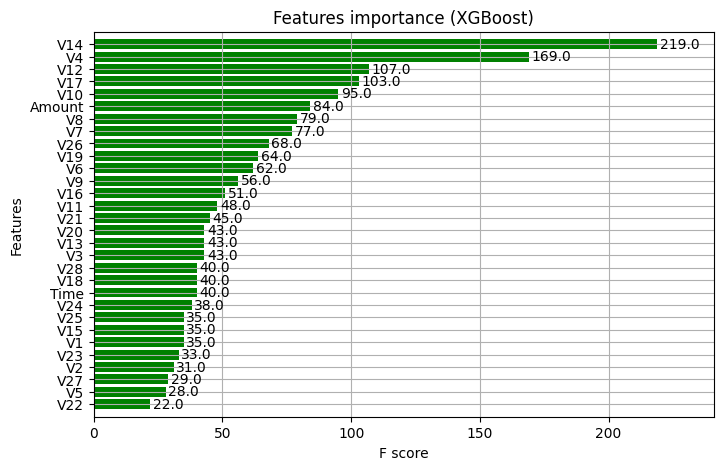

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

---

>Predict Test Set

In [ ]:
preds = model.predict(dtest)

---

F1-score

>Area Under Curve

In [ ]:
roc_auc_score(test_df[target].values, preds)

0.984362935871587

The AUC score for the prediction of fresh data (test set) is **0.98**

---

##Light GBM

> Define Model Parameters

In [ ]:
params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':150, # because training data is extremely unbalanced 
         }

---

> Creating Train Validate Dataset

In [ ]:
dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df[target].values,
                     feature_name=predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                     label=valid_df[target].values,
                     feature_name=predictors)

---

> Run the Model

In [ ]:
evals_results = {}

#Run the model using Train Function

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=2*EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095464 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 100 rounds
[50]	train's auc: 0.986784	valid's auc: 0.92025
[100]	train's auc: 0.982458	valid's auc: 0.906221
Early stopping, best iteration is:
[2]	train's auc: 0.97387	valid's auc: 0.97051


Best validation score was obtained for round 85, for which AUC ~= **0.97**



---

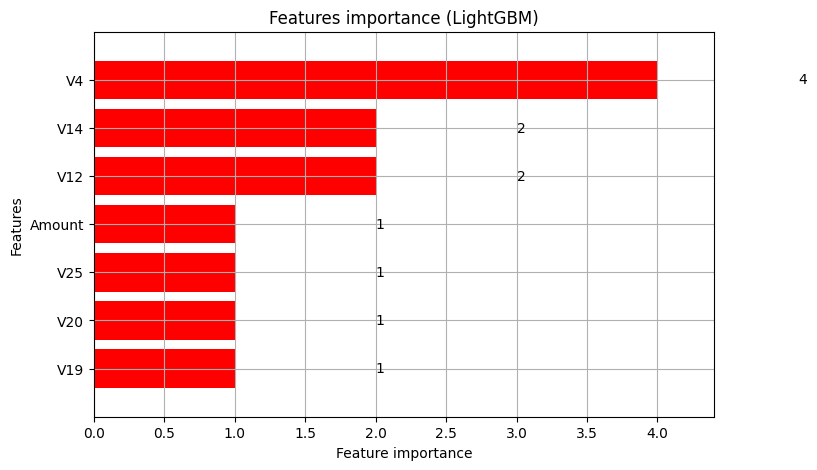

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
lgb.plot_importance(model, height=0.8, title="Features importance (LightGBM)", ax=ax,color="red") 
plt.show()

> Predict Test Data

In [ ]:
preds = model.predict(test_df[predictors])

---

> Area under curve

In [ ]:
roc_auc_score(test_df[target].values, preds)

0.951076589143652

The ROC-AUC score obtained for the test set is **0.951**

---

> Training and validation using cross-validation

In [ ]:
#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

import gc

kf = KFold(n_splits = NUMBER_KFOLDS, random_state = RANDOM_STATE, shuffle = True)

# Create arrays and dataframes to store results
oof_preds = np.zeros(train_df.shape[0])
test_preds = np.zeros(test_df.shape[0])
feature_importance_df = pd.DataFrame()
n_fold = 0
for train_idx, valid_idx in kf.split(train_df):
    train_x, train_y = train_df[predictors].iloc[train_idx],train_df[target].iloc[train_idx]
    valid_x, valid_y = train_df[predictors].iloc[valid_idx],train_df[target].iloc[valid_idx]
    
    evals_results = {}
    model =  LGBMClassifier(
                  nthread=-1,
                  n_estimators=2000,
                  learning_rate=0.01,
                  num_leaves=80,
                  colsample_bytree=0.98,
                  subsample=0.78,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  subsample_for_bin=50,
                  boosting_type='gbdt',
                  is_unbalance=False,
                  min_split_gain=0.025,
                  min_child_weight=40,
                  min_child_samples=510,
                  objective='binary',
                  metric='auc',
                  silent=-1,
                  verbose=-1,
                  feval=None)
    model.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], 
                eval_metric= 'auc', verbose= VERBOSE_EVAL, early_stopping_rounds= EARLY_STOP)
    
    oof_preds[valid_idx] = model.predict_proba(valid_x, num_iteration=model.best_iteration_)[:, 1]
    test_preds += model.predict_proba(test_df[predictors], num_iteration=model.best_iteration_)[:, 1] / kf.n_splits
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = predictors
    fold_importance_df["importance"] = clf.feature_importances_
    fold_importance_df["fold"] = n_fold + 1
    
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(valid_y, oof_preds[valid_idx])))
    del model, train_x, train_y, valid_x, valid_y
    gc.collect()
    n_fold = n_fold + 1
train_auc_score = roc_auc_score(train_df[target], oof_preds)
print('Full AUC score %.6f' % train_auc_score)

[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[50]	training's auc: 0.975109	valid_1's auc: 0.964242
Fold  1 AUC : 0.966735
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[50]	training's auc: 0.973376	valid_1's auc: 0.97159
[100]	training's auc: 0.974581	valid_1's auc: 0.975146
Fold  2 AUC : 0.976924
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[50]	training's auc: 0.971525	valid_1's auc: 0.981105
[100]	training's auc: 0.973605	valid_1's auc: 0.979233
Fold  3 AUC : 0.981177
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[50]	training's auc: 0.970153	valid_1's auc: 0.981887
Fold  4 AUC : 0.983433
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value

In [ ]:
pred = test_preds

---

## Conclusions

We looked into the data, looking for data imbalance, displaying the features, and determining how the various features related to one another. Next, we looked into two forecasting models. A train set, a validation set, and a test set were created from the data. Only the train and test set was used for the first three models.

Starting with RandomForrestClassifier, we were able to predict the test set's target with an AUC score of 0.89.


We then used an AdaBoostClassifier model to predict the target values for the test set, which had a lower AUC score of 0.91.


Afterwards, we tried using an XGBoost model. In this instance, she validated the training model using the validation set. The best validation score was 0.99, which was attained. The target value was then predicted from the test data using the model with the best training step; the resulting AUC score was 0.984.

After that, we gave a LightGBM model the data. To assess the model's ability to forecast the "Class" value, or the ability to determine whether a transaction was fraudulent, we utilised both train-validation split and cross-validation. With the first technique, we got AUC values for the validation set that were about 0.97. The result for the test set was a score of 0.946. Our cross-validation yielded an AUC value of 0.93 for the test prediction.

---